In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Conceptual Exercises

**1. Using basic statistical properties of the variance, as well as single-variable calculus, derive (5.6). In other words, prove that α given by**
\begin{equation}\label{5.6}
    \alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2 \sigma_{XY} }
    \tag{5.6}
\end{equation}
 **does indeed minimize** $\text{Var}(\alpha X + (1 − \alpha)Y )$.

Using the property $\text{Var}(aX+bY) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(X,Y)$

\begin{align*}
    \text{Var}(\alpha X + (1-\alpha)Y) = \alpha^2 \sigma_X^2 + (1-\alpha)^2 \sigma_Y^2 + 2\alpha (1-\alpha) \sigma_{XY} 
\end{align*}

We optimize by taking the  
derivative with respect to $\alpha$ and  
setting equal to zero.

\begin{align*}
    \frac{d}{d\alpha} (\alpha^2 \sigma_X^2 + (1-\alpha)^2 \sigma_Y^2 + 2\alpha (1-\alpha) \sigma_{XY}) &= 0 \newline
    2\alpha \sigma_X^2 - 2(1-\alpha)\sigma_Y^2 + 2\sigma_{XY} -4\alpha \sigma_{XY} &= 0 \newline
    2\alpha(\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}) - 2( \sigma_Y^2 - \sigma_{XY}) &= 0 \newline
\end{align*}

Now we solve for $\alpha$ to determine the  
minimum value for $\text{Var}(\alpha X + (1 − \alpha)Y )$.

\begin{align*}
    \Rightarrow \alpha(\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}) &=  \sigma_Y^2 - \sigma_{XY} \newline
    \alpha &= \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}}
\end{align*}

---

**2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.**

**(a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.**

The probability that the first bootstrap observation **is** the $j^{th}$ observation from the original sample is equivalent to the probability that we randomly select the $j^{th}$ observation from the original sample of size n.

\begin{align*}
    P(j) = \frac{1}{n}
\end{align*}

Since we want the compliment of this probability to get the probablity that we did **not** randomly select this observation, we have

\begin{align*}
    P(\neg j) &= P(j)^c = 1 - P(j) \newline
    &= 1 - \frac{1}{n}
\end{align*}

**(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?**

Bootstrap implies **replacement**, thus the probability that the second bootstrap observation is not the jth observation is equal to the probability that it is not the first bootstrap observation.

This is the same as above. $1 - \frac{1}{n}$

**(c) Argue that the probability that the jth observation is not in the
bootstrap sample is** $(1 − \frac{1}{n})^n$.

As we saw in part (b), the probability that the $j^{th}$ observation is not in the $i^{th}$ bootstrap sample  
is $1 - \frac{1}{n}$. Therefore, we can compute the probability that it does not exist in the sample by multiplying the independent probabilities over the bootstrap sample $S_B$ of size $N$.

\begin{align*}
    P(j \notin S_B) = \prod_{i = 1}^{N} P(\neg j) &= \prod_{i = 1}^{N} \left(1 - \frac{1}{n} \right) = \left(1 - \frac{1}{n} \right)^N
\end{align*}

If we make the bootstrap sample to be the same size of the original sample ($N=n$), we have

\begin{align*}
    P(j \notin S_B) = \left(1 - \frac{1}{n} \right)^n
\end{align*}

**(d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?**

The probability that observation $j$ **is** in the sample $S_B$ is the compliment of the probability that the observation $j$ is **not** in the sample $S_B$.

\begin{align*}
    P(j \in S_B) = P(j \notin S_B)^c &= 1 - P(j \notin S_B) \newline
    &= 1 - \left(1 - \frac{1}{n} \right)^n \newline
    &= 1 - \left(1 - \frac{1}{5} \right)^5 \newline
    &\approx 0.67
\end{align*}


**(e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?**

\begin{align*}
     P(j \in S_B) &= 1 - \left(1 - \frac{1}{100} \right)^{100} \newline
     &\approx 0.63
\end{align*}

**(f) When n = 10 000, what is the probability that the jth observation is in the bootstrap sample?**

\begin{align*}
     P(j \in S_B) &= 1 - \left(1 - \frac{1}{10,000} \right)^{10,000} \newline
     &\approx 0.63
\end{align*}

**(g) Create a plot that displays, for each integer value of n from 1 to 100 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.**

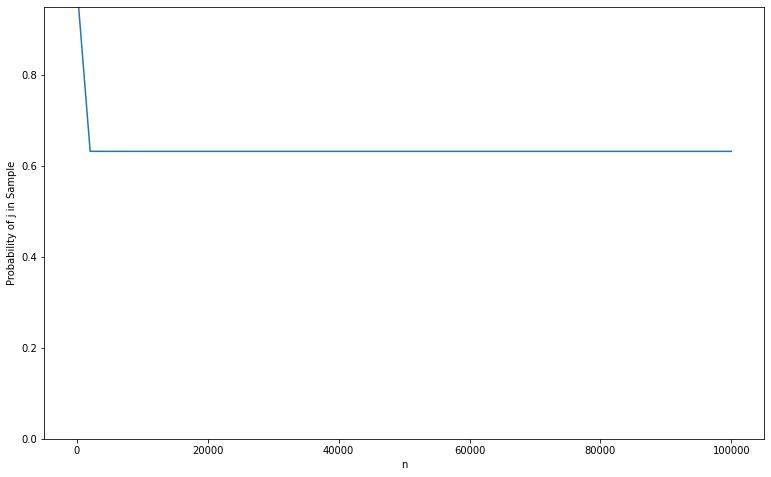

In [2]:
# Probability of j in Sample
x = np.linspace(1,100000)

def prob(n):
    return ( 1 - (1 - (1/n))**n )

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Probability of j in Sample')
ax.set_ylim(ymax=0.95)
ax.set_xlabel('n')

ax.plot(x, prob(x))
plt.show()

The probability appears to converge to $0.63$. Indeed, if we compute the limit we will find that
\begin{align*}
    \lim_{n \to \infty} \left[ 1 - \left(1 - \frac{1}{n} \right)^n \right] = \frac{-1 + e}{e} \approx 0.632121
\end{align*}

---

**3. We now review k-fold cross-validation.**

**(a) Explain how k-fold cross-validation is implemented.**

We take a sample and divide it evenly into $k$ number of sub-samples. The $k$ sub-samples are then used to train the model, while the remaining data is used to test the model. What we are left with is $k$ number of mean test errors.

**(b) What are the advantages and disadvantages of k-fold cross-validation relative to:**

**i. The validation set approach?**

Validation set approach will divide the data in half. One half to train the model, the other half to test.
Additionally, you don't seem to resample the other half of the data to obtain a second MSE. I believe this makes it different from the $k$-fold CV special case where $k=2$.

The validation set approach will only give us a single value estimate for the error. In addition, the error on the validation set is a poor reflection of the performance of the full model where we use all the data. $k$-fold CV also uses every single piece of data as both a train and test data point. The disadvantage is that each of our $k$ has more variability individually since our test errors are run on smaller sets.

**ii. LOOCV?**

$k$-fold CV is much less computationally intensive than LOOCV. $k$-fold also tends to give better estimates of the error over LOOCV.

---

**4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.**

The bootstrap method provides an approximately unbiased estimation of the population's standard deviation when given only a sample. So we would produce a large number ($B$) of bootstrap samples of $X$ and make $B$-many predictions to get a result $\hat{Y} = \text{Ave} \left( \hat{Y}_1, \ldots, \hat{Y}_B \right) $. The standard deviation would be computed from the $B$-many predictions, $\{ \hat{Y}_1, \ldots, \hat{Y}_B \}$